In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
 #sklearn preproc
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
data_index=pd.read_csv('../data/out_csv/index_Brazil.csv')

In [4]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-03-17,0.082695,0.114918,0.142755,321.0,121.0,1.0,1.0,0.084806,0.0,0.0,0.0,0.0
1,2020-03-18,0.086331,0.120439,0.142755,372.0,51.0,3.0,2.0,0.088239,0.0,0.0,0.0,0.0
2,2020-03-19,0.093624,0.131460,0.142755,621.0,249.0,6.0,3.0,0.095126,0.0,0.0,0.0,0.0
3,2020-03-20,0.093624,0.131460,0.142755,793.0,172.0,11.0,5.0,0.095126,0.0,0.0,0.0,0.0
4,2020-03-21,0.105800,0.142501,0.142755,1021.0,228.0,15.0,4.0,0.106591,0.0,0.0,0.0,0.0


In [5]:
data_index=data_index.set_index('date')

In [6]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,432.0,92.0,15.0,0.113456,0.0,0.0,...,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,487.0,111.0,19.0,0.113456,0.0,0.0,...,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,352.0,136.0,25.0,0.113456,0.0,0.0,...,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,323.0,159.0,23.0,0.113456,0.0,0.0,...,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,1138.0,201.0,42.0,0.113456,0.0,0.0,...,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0


In [7]:
data_index=data_index.fillna(0)

In [8]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,432.0,92.0,15.0,0.113456,0.0,0.0,...,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,487.0,111.0,19.0,0.113456,0.0,0.0,...,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,352.0,136.0,25.0,0.113456,0.0,0.0,...,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,323.0,159.0,23.0,0.113456,0.0,0.0,...,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,1138.0,201.0,42.0,0.113456,0.0,0.0,...,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0


Text(0.5, 0, 'Date')

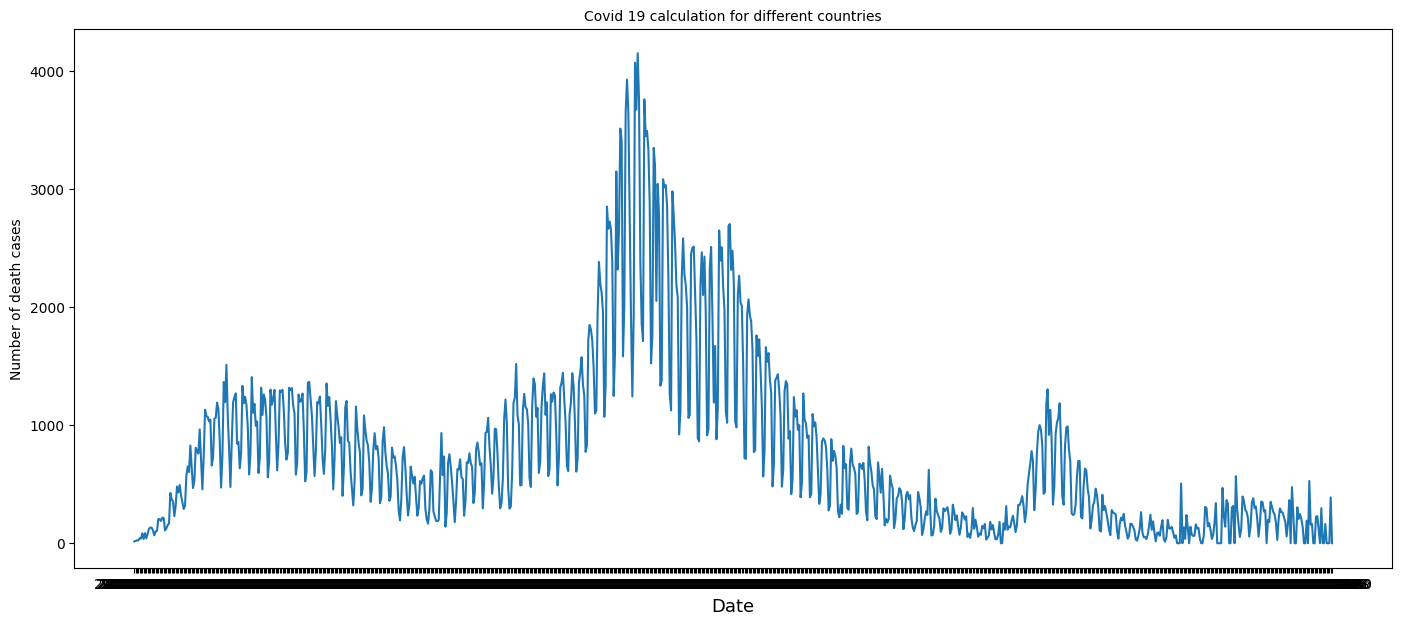

In [11]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

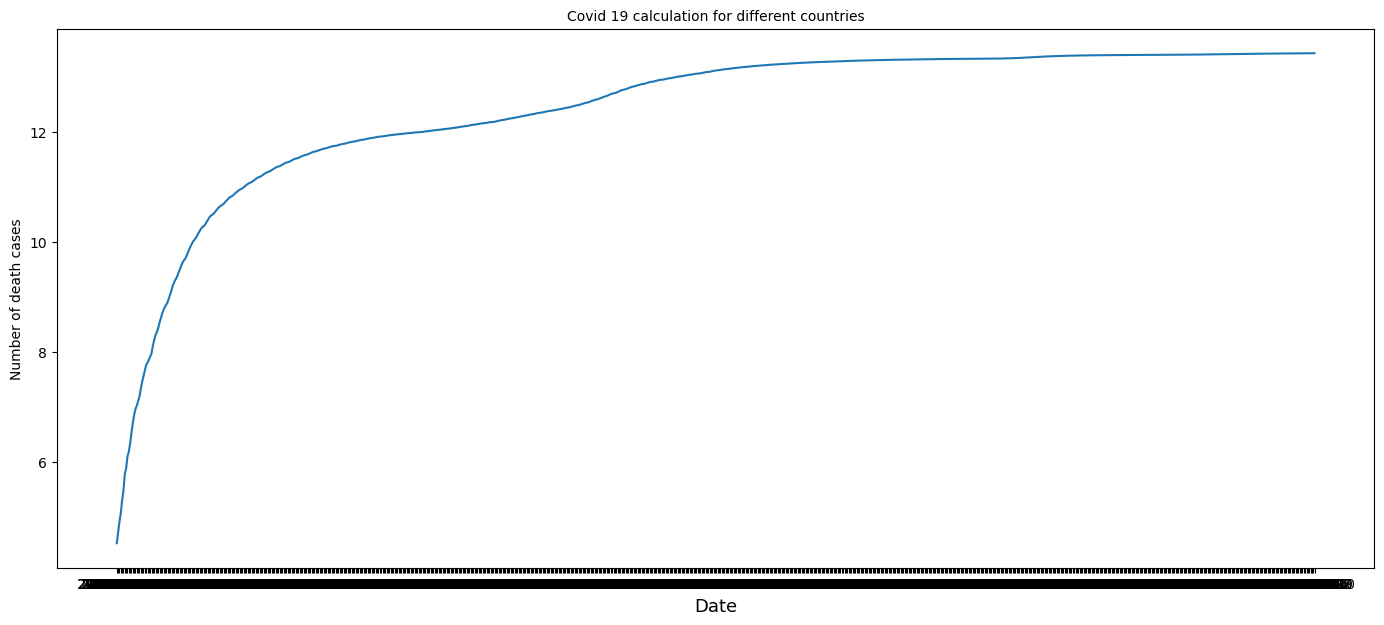

In [29]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

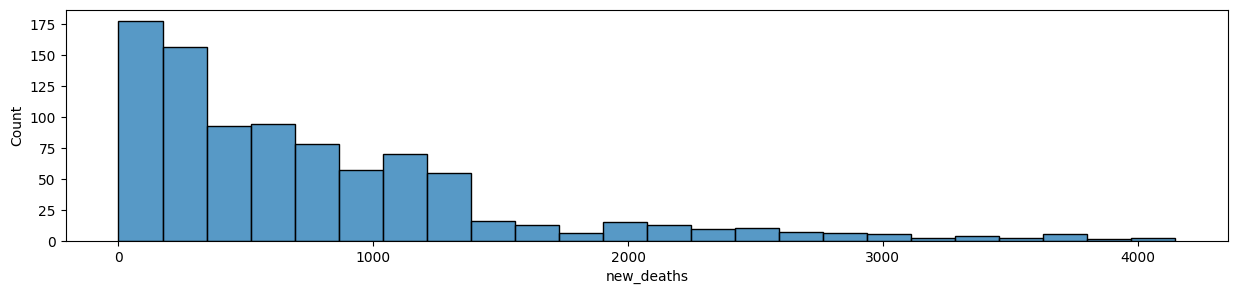

In [30]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [13]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

In [14]:
X

,containment_and_health,stringency,economics_sup,total_cases,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,
2020-03-27,0.113093,0.148022,0.142755,3417.0,0.113456,0.0,0.0,0.0,0.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0,1.0
2020-03-28,0.113093,0.148022,0.142755,3904.0,0.113456,0.0,0.0,0.0,0.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0,3.0
2020-03-29,0.113093,0.148022,0.142755,4256.0,0.113456,0.0,0.0,0.0,0.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0,6.0
2020-03-30,0.113093,0.148022,0.142755,4579.0,0.113456,0.0,0.0,0.0,0.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0,11.0
2020-03-31,0.113093,0.148022,0.142755,5717.0,0.113456,0.0,0.0,0.0,0.0,159.0,136.0,111.0,92.0,77.0,59.0,46.0,34.0,25.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,0.000000,0.000000,0.000000,34477539.0,0.062229,470898070.0,186618522.0,171809197.0,117896301.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0,683622.0,683397.0,683397.0
2022-09-07,0.000000,0.000000,0.000000,34477539.0,0.062229,470910315.0,186624508.0,171811546.0,117900233.0,684425.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0,683622.0,683397.0
2022-09-08,0.000000,0.000000,0.000000,34477539.0,0.062229,470943250.0,186632925.0,171821267.0,117915066.0,684425.0,684425.0,684425.0,684262.0,684262.0,684262.0,683965.0,683965.0,683851.0,683622.0


## scaling data

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [16]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

# Model

In [23]:
model =SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

In [22]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits


SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## fitting the model for train and test set

In [24]:
model.fit(X_train,y_train)

SVR(C=5, coef0=10, degree=8, epsilon=0.05, gamma='auto', kernel='poly')

## prediction

In [25]:
y_pred=model.predict(X_test)

## evaluating model performance

In [26]:
score=mean_absolute_percentage_error(y_test, y_pred)
score

0.004332107786035479

Text(0.5, 0, 'Date')

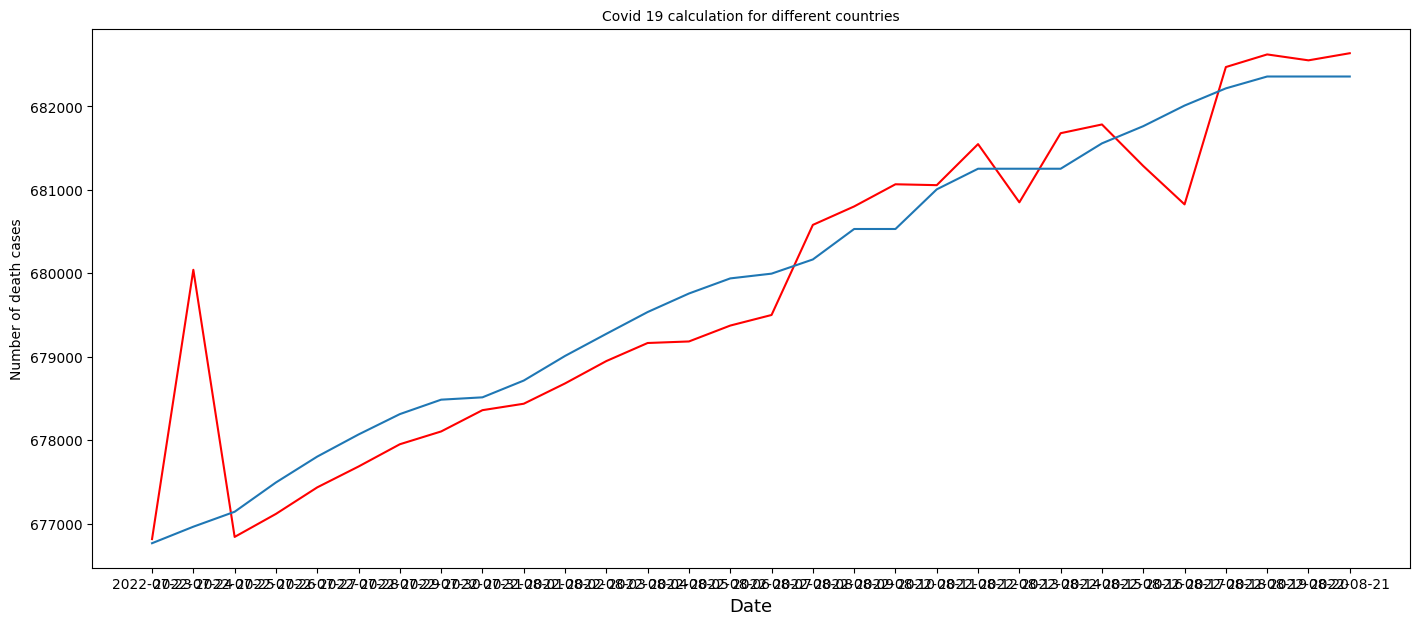

[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=3, kernel=poly; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=3, kernel=rbf; total time=   0.0s
[CV] END ................C=5, coef0=10, degree=8, kernel=rbf; total time=   0.0s
[CV] END .............C=6, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=6, coef0=0.01, degree=3, kernel=rbf; total time=   0.0s
[CV] END .............C=6, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END .............C=6, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ..............C=6, coef0=0.01, degree=8, kernel=rbf; total time=   0.0s
[CV] END ...............C=6,

In [28]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:30],y_pred[:30] ,color='r');
plt.plot(y_test.index[:30],y_test[:30]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)